In [29]:
import numpy as np
import time
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp
import matplotlib.pyplot as plt
import seaborn as sns;
import helper
import gym

# graph setup and styling
sns.set_style('dark')
flatui = ["#2ecc71", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
sns.set_palette(flatui)

# gym setup
problemName = 'FrozenLake'
env = gym.make("FrozenLake8x8-v0")

In [30]:
reward, policy = np.zeros([env.nS, env.nA]), np.zeros([env.nA, env.nS, env.nS])        
reward, policy = helper.transform_env(env, reward, policy)

In [31]:
# setting up VI Analysis

value_store = {
    'iterations': [],
    'time': [],
    'policy': [],
    'reward': [],
    'mean V': [],
    'max V': [],
    'error': []
}

iter_range = np.arange(10000, 1000000, 100000)

j = 0
for i in iter_range:
    print('On run ' + str(j))
    value_iteration = hiive.mdptoolbox.mdp.QLearning(policy, reward, 0.95, n_iter=i)
    run = value_iteration.run()
    value_store['policy'].append(value_iteration.policy)
    value_store['iterations'].append(run[-1]['Iteration'])
    value_store['time'].append(run[-1]['Time'])
    value_store['reward'].append(run[-1]['Reward'])
    value_store['mean V'].append(run[-1]['Mean V'])
    value_store['max V'].append(run[-1]['Max V'])
    value_store['error'].append(run[-1]['Error'])
    j += 1
    print(value_iteration.time)

print(value_store['reward'])
print(value_store['max V'])
print(value_store['error'])
print(value_store['mean V'])
print('final policy: ' + str(value_store['policy'][-1]))

# print(run[0])
# print(run[-1])

On run 0
0.579028844833374
On run 1
5.596537113189697
On run 2
10.47614598274231
On run 3
15.522968053817749
On run 4
20.07815194129944
On run 5
25.41037607192993
On run 6
29.5690701007843
On run 7
34.84667181968689
On run 8
40.693177938461304
On run 9
45.97722387313843
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.04784655048375642, 0.11663662562350623, 0.11762249078027515, 0.21551902425235644, 0.2957445660462397, 0.28674131380259965, 0.3506849049890919, 0.3313450611459219, 0.48559688179430693]
[0.0, 1.5920370784597638e-32, 1.1329899254642877e-15, 0.0, 3.995136232680891e-08, 6.264965405870342e-07, 3.557926881968959e-19, 4.347611002748779e-09, 2.26754169884133e-17, 6.317668066960143e-12]
[0.0, 0.0010879537685604035, 0.0029658941550238242, 0.00336149889810661, 0.006737619426549583, 0.008807901664168808, 0.00857202305637932, 0.010933186837364248, 0.011253580974167144, 0.013562214819911737]
final policy: (2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 3, 3, 2, 3, 0, 2, 2, 0, 0, 1, 1, 2, 0,

In [16]:
print(run[0])
print(run[-1])

{'State': 63, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.005733013153076172, 'Alpha': 0.0404731972678324, 'Epsilon': 0.4047319726783239, 'Gamma': 0.95, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 91}
{'State': 47, 'Action': 0, 'Reward': 0.0, 'Error': 4.7793830644980324e-05, 'Time': 41.516932010650635, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.95, 'Max V': 0.5712985804876425, 'Mean V': 0.017448663605072665, 'Iteration': 910000}


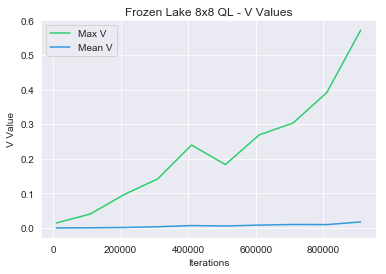

In [17]:
# mean and max v
plt.figure()
plt.plot(iter_range, value_store['max V'], label='Max V')
plt.plot(iter_range, value_store['mean V'], label='Mean V')
plt.title('Frozen Lake 8x8 QL - V Values')
plt.xlabel('Iterations')
plt.ylabel("V Value")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


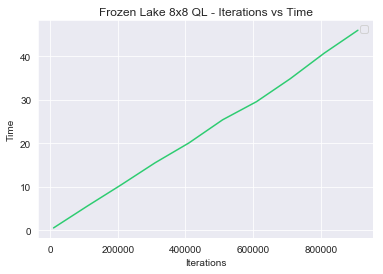

In [32]:
# reward
plt.figure()
plt.plot(iter_range, value_store['time'])
plt.title('Frozen Lake 8x8 QL - Iterations vs Time')
plt.xlabel('Iterations')
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


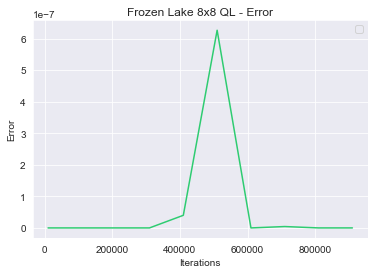

In [33]:
# reward
plt.figure()
plt.plot(iter_range, value_store['error'])
plt.title('Frozen Lake 8x8 QL - Error')
plt.xlabel('Iterations')
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

In [20]:
# setting up VI Analysis

value_store = {
    'iterations': [],
    'time': [],
    'policy': [],
    'reward': [],
    'mean V': [],
    'max V': [],
    'error': []
}

iter_range = np.arange(.1,1,.1)

j = 0
for i in iter_range:
    print('On run ' + str(j))
    value_iteration = hiive.mdptoolbox.mdp.QLearning(policy, reward, i, n_iter=700000)
    run = value_iteration.run()
    value_store['policy'].append(value_iteration.policy)
    value_store['iterations'].append(run[-1]['Iteration'])
    value_store['time'].append(run[-1]['Time'])
    value_store['reward'].append(run[-1]['Reward'])
    value_store['mean V'].append(run[-1]['Mean V'])
    value_store['max V'].append(run[-1]['Max V'])
    value_store['error'].append(run[-1]['Error'])
    j += 1
    print(value_iteration.time)

print(value_store['reward'])
print(value_store['max V'])
print(value_store['error'])
print(value_store['mean V'])
print('final policy: ' + str(value_store['policy'][-1]))

# print(run[0])
# print(run[-1])

On run 0
32.3873929977417
On run 1
32.026939153671265
On run 2
32.02238917350769
On run 3
32.609586000442505
On run 4
31.833817720413208
On run 5
31.98021101951599
On run 6
35.632306814193726
On run 7
32.59075713157654
On run 8
32.51545023918152
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.34573705328305054, 0.24434407998365623, 0.3514055057398637, 0.3348100276895304, 0.30372029745290274, 0.32851526064453146, 0.3945439677663176, 0.38566149617232165, 0.3808905210986899]
[2.9869020610184296e-05, 3.278589229620399e-13, 4.168787120747192e-16, 2.7599346991243747e-16, 4.396176696056016e-14, 1.5770088247783638e-18, 0.0, 3.674182500974237e-13, 0.0]
[0.010223731160430792, 0.003893319554645223, 0.009768431205662348, 0.008983774437939789, 0.009211960775961306, 0.010845719996065113, 0.012503449514377039, 0.012137048636382684, 0.011365614900303201]
final policy: (1, 1, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 2, 0, 3, 3, 0, 0, 2, 3, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 3, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2

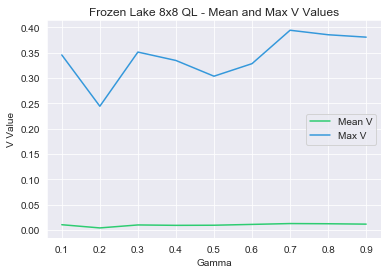

In [21]:
# mean and max v
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['mean V'], label='Mean V')
plt.plot(np.arange(.1,1,.1), value_store['max V'], label='Max V')
plt.title('Frozen Lake 8x8 QL - Mean and Max V Values')
plt.xlabel('Gamma')
plt.ylabel("V Value")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


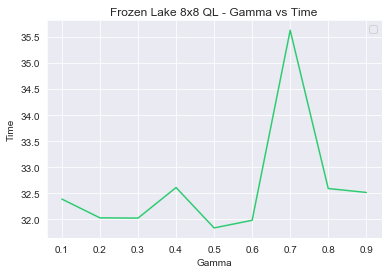

In [22]:
# reward
plt.figure()
plt.plot(np.arange(.1,1,.1), value_store['time'])
plt.title('Frozen Lake 8x8 QL - Gamma vs Time')
plt.xlabel('Gamma')
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


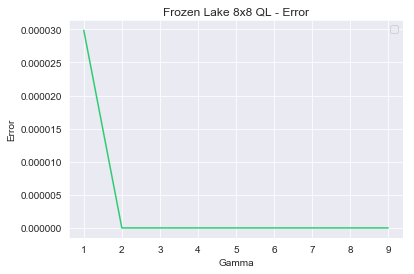

In [23]:
# reward
plt.figure()
plt.plot(np.arange(1,10), value_store['error'])
plt.title('Frozen Lake 8x8 QL - Error')
plt.xlabel('Gamma')
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


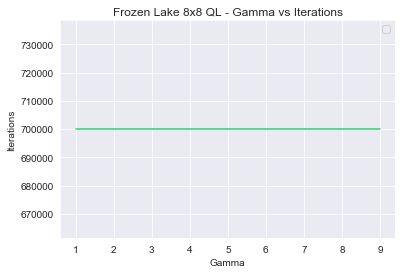

In [24]:
# reward
plt.figure()
plt.plot(np.arange(1,10), value_store['iterations'])
plt.title('Frozen Lake 8x8 QL - Gamma vs Iterations')
plt.xlabel('Gamma')
plt.ylabel("Iterations")
plt.legend()
plt.grid()
plt.show()

In [34]:
# setting up VI Analysis

value_store = {
    'iterations': [],
    'time': [],
    'policy': [],
    'reward': [],
    'mean V': [],
    'max V': [],
    'error': []
}

iter_range = np.arange(0.001, 0.01, 0.001)

j = 0
for i in iter_range:
    print('On run ' + str(j))
    value_iteration = hiive.mdptoolbox.mdp.QLearning(policy, reward, i, epsilon=i, n_iter=700000)
    run = value_iteration.run()
    value_store['policy'].append(value_iteration.policy)
    value_store['iterations'].append(run[-1]['Iteration'])
    value_store['time'].append(run[-1]['Time'])
    value_store['reward'].append(run[-1]['Reward'])
    value_store['mean V'].append(run[-1]['Mean V'])
    value_store['max V'].append(run[-1]['Max V'])
    value_store['error'].append(run[-1]['Error'])
    j += 1
    print(value_iteration.time)

print(value_store['reward'])
print(value_store['max V'])
print(value_store['error'])
print(value_store['mean V'])
print('final policy: ' + str(value_store['policy'][-1]))

# print(run[0])
# print(run[-1])

On run 0
34.41688323020935
On run 1
34.49138426780701
On run 2
37.17483997344971
On run 3
35.05885314941406
On run 4
35.690349102020264
On run 5
37.246357679367065
On run 6
36.43980383872986
On run 7
34.95660424232483
On run 8
34.59048509597778
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.35225265479131135, 0.24583273372933367, 0.3052894259533602, 0.24053239033815457, 0.28055821174484935, 0.37531936291049284, 0.28559307902046704, 0.45681532878485853, 0.39207674776341894]
[1.8806620123112097e-50, 0.0, 1.1855012493823054e-50, 0.0, 1.4462243076492062e-20, 0.0, 0.0, 6.519873733412993e-07, 2.4422842008266505e-20]
[0.009286741670899646, 0.006701377263206246, 0.008973373595759556, 0.006984776676902447, 0.007856315873639169, 0.010683690325912366, 0.008448507316394037, 0.013278588441757985, 0.010046114893347132]
final policy: (2, 2, 1, 3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 3, 3, 1, 0, 3, 2, 0, 2, 2, 0, 3, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0

No handles with labels found to put in legend.


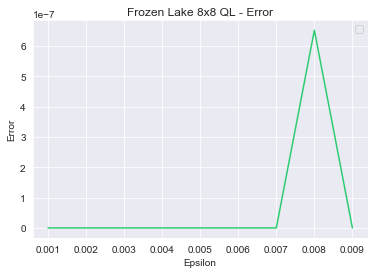

In [35]:
# reward
plt.figure()
plt.plot(iter_range, value_store['error'])
plt.title('Frozen Lake 8x8 QL - Error')
plt.xlabel('Epsilon')
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


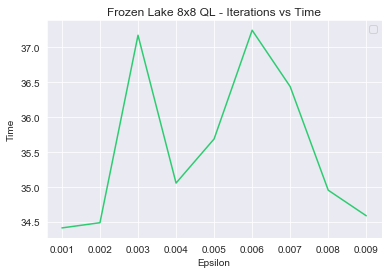

In [36]:
# reward
plt.figure()
plt.plot(iter_range, value_store['time'])
plt.title('Frozen Lake 8x8 QL - Iterations vs Time')
plt.xlabel('Epsilon')
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.show()

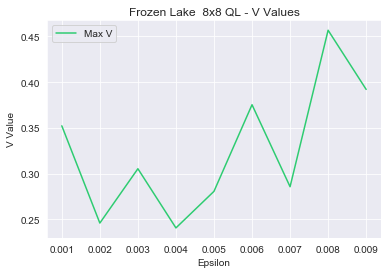

In [37]:
# mean and max v
plt.figure()
plt.plot(iter_range, value_store['max V'], label='Max V')
plt.title('Frozen Lake  8x8 QL - V Values')
plt.xlabel('Epsilon')
plt.ylabel("V Value")
plt.legend()
plt.grid()
plt.show()